# "The Thera bank" Churn Prediction

## Context

### Background

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas.

Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards


### Objective

1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Generate a set of insights and recommendations that will help the bank

### Data dictionary

1. CLIENTNUM: Client number. Unique identifier for the customer holding the account
2. Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
3. Customer_Age: Age in Years
4. Gender: Gender of the account holder
5. Dependent_count: Number of dependents
6. Education_Level: Educational Qualification of the account holder
7. Marital_Status: Marital Status of the account holder
8. Income_Category: Annual Income Category of the account holder
9. Card_Category: Type of Card
10. Months_on_book: Period of relationship with the bank
11. Total_Relationship_Count: Total no. of products held by the customer
12. Months_Inactive_12_mon: No. of months inactive in the last 12 months
13. Contacts_Count_12_mon: No. of Contacts in the last 12 months
14. Credit_Limit: Credit Limit on the Credit Card
15. Total_Revolving_Bal: Total Revolving Balance on the Credit Card
16. Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
17. Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
18. Total_Trans_Amt: Total Transaction Amount (Last 12 months)
19. Total_Trans_Ct: Total Transaction Count (Last 12 months)
20. Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
21. Avg_Utilization_Ratio: Average Card Utilization Ratio

## Dataset

### Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

### Load dataset

In [2]:
churners = pd.read_csv(os.path.join(os.environ['PWD'],'data/BankChurners.csv'))

### Structure of dataset

In [3]:
churners.shape

(10127, 21)

In [4]:
churners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [5]:
churners.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

### Duplicates check

In [6]:
churners.duplicated().sum()

0

In [7]:
churners['CLIENTNUM'].duplicated().sum()

0

### Change type of columns and drop CustomerID column

In [8]:
churners_2 = churners.drop('CLIENTNUM', axis=1)

In [9]:
for feature in churners_2.columns: 
    if churners_2[feature].dtype == 'object': 
        churners_2[feature] = pd.Categorical(churners_2[feature])#replace string objects to categorical

### Lists for categorical and numerical features and response

In [10]:
cat_features = churners_2.columns[churners_2.nunique() < 15]
cat_features = np.delete(cat_features, cat_features == 'Attrition_Flag')
num_features = churners_2.columns[churners_2.nunique() >= 15]
response = 'Attrition_Flag'

### Categories of categorical variables

In [11]:
print('Attrition_Flag','  ---->  ',churners_2['Attrition_Flag'].unique())

Attrition_Flag   ---->   ['Existing Customer', 'Attrited Customer']
Categories (2, object): ['Attrited Customer', 'Existing Customer']


In [12]:
for feature in cat_features:
  print(feature,'  ---->  ',churners_2[feature].unique())

Gender   ---->   ['M', 'F']
Categories (2, object): ['F', 'M']
Dependent_count   ---->   [3 5 4 2 0 1]
Education_Level   ---->   ['High School', 'Graduate', 'Uneducated', 'Unknown', 'College', 'Post-Graduate', 'Doctorate']
Categories (7, object): ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown']
Marital_Status   ---->   ['Married', 'Single', 'Unknown', 'Divorced']
Categories (4, object): ['Divorced', 'Married', 'Single', 'Unknown']
Income_Category   ---->   ['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'Unknown']
Categories (6, object): ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Unknown']
Card_Category   ---->   ['Blue', 'Gold', 'Silver', 'Platinum']
Categories (4, object): ['Blue', 'Gold', 'Platinum', 'Silver']
Total_Relationship_Count   ---->   [5 6 4 3 2 1]
Months_Inactive_12_mon   ---->   [1 4 2 3 6 0 5]
Contacts_Count_12_mon   ---->   [3 2 0 1 4 5 6]


Variables: Education_Level, Marital_Status and Income_Category have some 'Unknown', we should consider imputation of these variables.

### Statistics of dataset

In [13]:
churners_2[response].describe()

count                 10127
unique                    2
top       Existing Customer
freq                   8500
Name: Attrition_Flag, dtype: object

- We have unbalanced dataset in favour of existing customers.

In [14]:
churners_2[num_features].describe().T

count         mean          std     min       25%  \
Customer_Age           10127.0    46.325960     8.016814    26.0    41.000   
Months_on_book         10127.0    35.928409     7.986416    13.0    31.000   
Credit_Limit           10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal    10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy        10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1   10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt        10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct         10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1    10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio  10127.0     0.274894     0.275691     0.0     0.023   

                            50%        75%        max  
Customer_Age             46.000     52.000     73.000  
Months_on_book           36.000     40.000     56.000  
Credit_Limit           4549.000  11067.500  34516.000  
Total_Revolving_Bal    1276.000   1784.000   2517.000  
Avg_Open_To_Buy        3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1      0.736      0.859      3.397  
Total_Trans_Amt        3899.000   4741.000  18484.000  
Total_Trans_Ct           67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1       0.702      0.818      3.714  
Avg_Utilization_Ratio     0.176      0.503      0.999

- Age of customers is between 26 and 73 years old.
- Monts_on_book differ between 36 and 56
- Credit_Limit is highly light skewed, probably with some outliers
- Total_Revolving_Bal differ between 0 and 2517
- Avg_Open_To_Buy is highly light skewed, probably with some outliers
- Total_Amt_Chng_Q4_Q1 differ between 0 and 3.4, seems to have some outliers
- Total_Trans_Amt is lightly left skewed with probably some outliers
- Total_Trans_Ct differ between 45 and 139
- Total_Ct_Chng_Q4_Q1 differ between 0 and 3.7, probably has some outliers
- Avg_Utilization_Ratio is left skewed, differ between 0 and 1

In [15]:
churners_2[cat_features].astype(object).describe().T

count unique             top  freq
Gender                    10127      2               F  5358
Dependent_count           10127      6               3  2732
Education_Level           10127      7        Graduate  3128
Marital_Status            10127      4         Married  4687
Income_Category           10127      6  Less than $40K  3561
Card_Category             10127      4            Blue  9436
Total_Relationship_Count  10127      6               3  2305
Months_Inactive_12_mon    10127      7               3  3846
Contacts_Count_12_mon     10127      7               3  3380

- There is slight prevalence of Females
- Most of customers have 3 Dependants
- Most of customers are Graduate
- Most of customers are Married
- Most of customers earn less than $40k 
- There is high prevalence on possesors of Blue card category
- Most of customers have 3 Relationship, 3 number of inactive months, 3 number of contacts in last 12 months

### Check for missing values

In [16]:
churners_2.isna().sum().sum()

0

There is no clear missing values.

In [17]:
churners_2.Education_Level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

There is quite hight number of unknown education level. So we will left it as it is.

In [18]:
churners_2.Marital_Status.value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

There is quite hight number of unknown marital status. So we will left it as it is.

In [19]:
churners_2.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

There is quite hight number of unknown income category. So we will left it as it is.

## EDA

### Univariate analysis

In [20]:
# Function to plot all needed plots on grid
def univariate(data,col,wrap = 3,type='box',figsize=(8,8),gridspec_kw=dict(wspace=0.4),showfliers = True,label_chars=5):
  import math
  l = len(col)
  fig, ax = plt.subplots(math.ceil(l/wrap),wrap,figsize=figsize,gridspec_kw=gridspec_kw, squeeze=False)
  sns.set_theme()
  for i in range(l):
    if type == 'box':
      sns.boxplot(data=data,y=col[i], ax = ax[i//wrap][i%wrap], showfliers = showfliers)
    elif type == 'hist':
      sns.histplot(data=data,x=col[i], ax = ax[i//wrap][i%wrap], kde=True)
    elif type == 'count':
      if data[col[i]].dtype.name == 'category' or data[col[i]].dtype == np.object:
        g = sns.countplot(data=data,x=col[i], ax = ax[i//wrap][i%wrap], order = data[col[i]].unique().sort_values())
        g.set_xticklabels(labels=[j[:label_chars] for j in data[col[i]].unique().sort_values()]);
      else:
        sns.countplot(data=data,x=col[i], ax = ax[i//wrap][i%wrap])

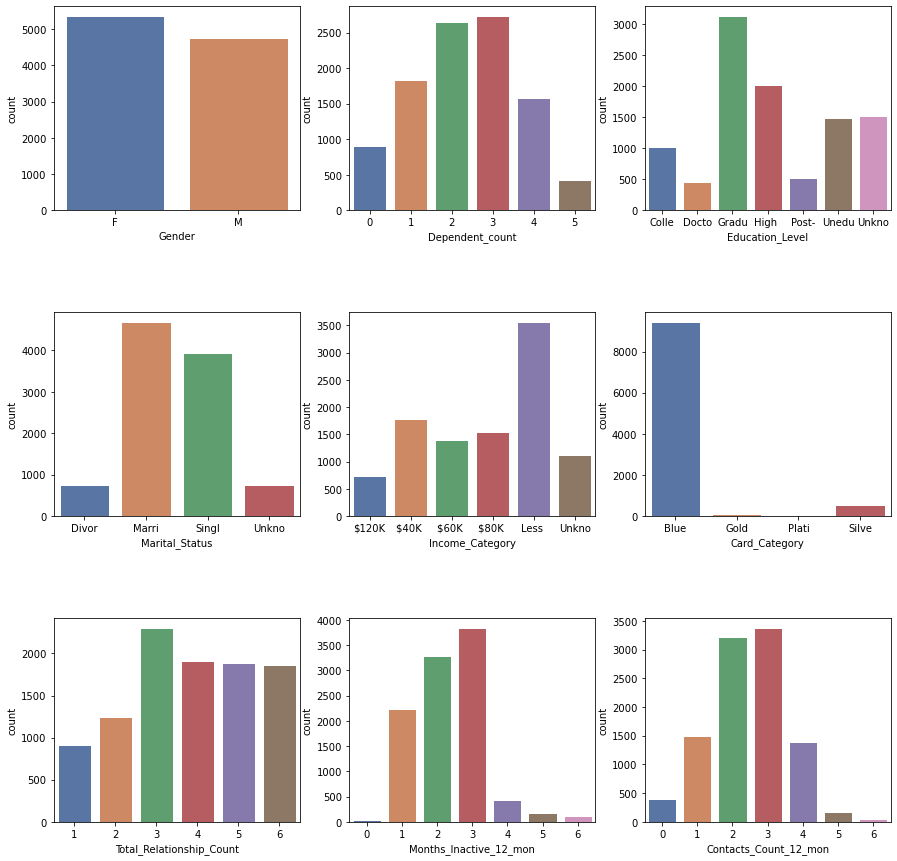

In [21]:
univariate(churners_2,cat_features,wrap = 3,type='count',figsize=(15,15),gridspec_kw=dict(hspace=0.5))

- Slight prevalence of Female customers
- Most of customers have 2 or 3 dependants, maximus is 5 and minimum 0
- Most of customers are Graduated or after high school, there is quite significant numer of customers with unknown education level
- Most of customers are Married or Singled
- Most of customers have less than $40k of income
- There is prevalence of customers with blue card and very small with silver, gold and platinum
- Most of customers have 3 relationship, the smallest number customers have only one relationship
- Most of customers were inactive from 1 to 3 months, there is small number of inactive customers for 4,5 or 6 months, an insignificant number of active customers
- Most customers have 2 or 3 contacts

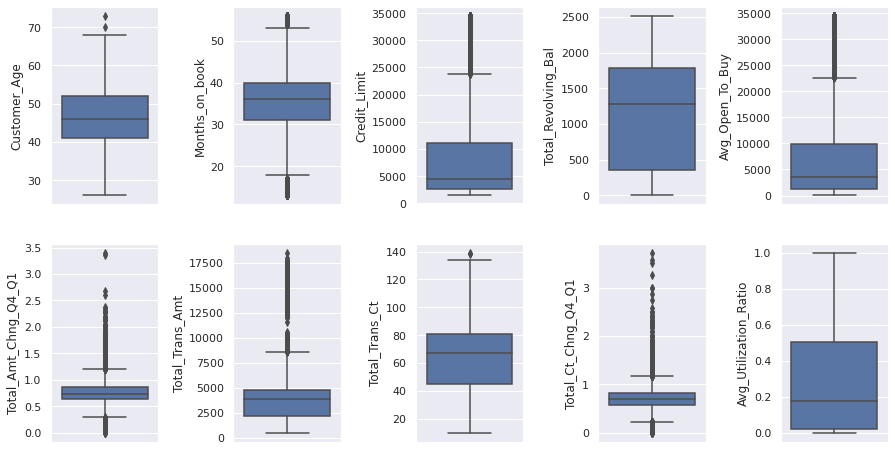

In [22]:
univariate(churners_2,num_features, wrap = 5,type='box',figsize=(15,8),gridspec_kw=dict(wspace=0.7))

Some variables are skewed. Most of them have outliers, but they are not singular instances, so we should consider transformations of variables to deal with them.

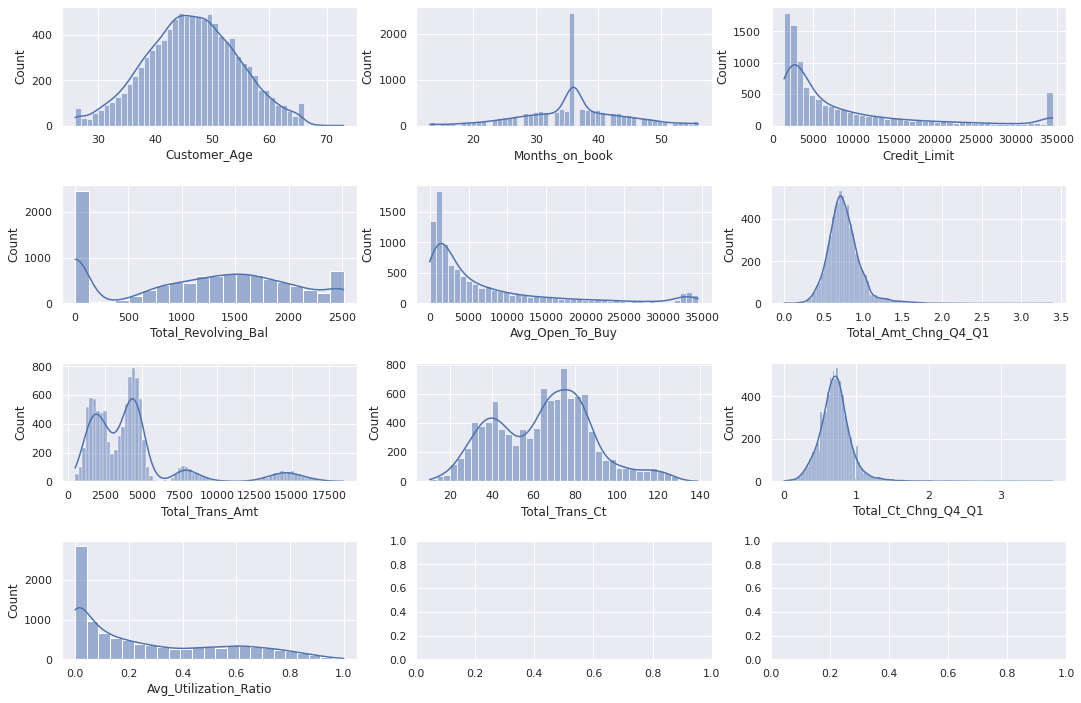

In [23]:
univariate(churners_2,num_features, wrap = 3,type='hist',figsize=(18,12),gridspec_kw=dict(hspace=0.5))

- There is quite high numer of customers with particular period of relationship approximately 35 month
- Number of customers is falling with Credit Limit, but there is jump in number for the highes credit limit, around $35k
- Total Revolving Balance on the Credit Card - Most customers have its value 0. And there is significant part of customers with quite high revolving balance
- Open to Buy Credit Line - Most customer have its value around 0. And there is some higher number at the end of distribution
- Change in Transaction Amount - Normally distributed but with some outliers
- Total Transaction Amount - We can notice 3 or 4 groups of customers
- Total Transaction Count - We can notice two peaks around 40 and 80 transactions
- Change in Transaction Count - Normally distributed but with some outliers
- Avg_Utilization_Ratio - There is high group in 0

### Bivariate analysis (feature + response)

In [24]:
#Function to plot all needed plots on grid
def univariate_response(data,col,response,wrap = 3,type='box',figsize=(8,8),gridspec_kw=dict(wspace=0.4),showfliers = True,label_chars=-1):
  import math
  l = len(col)
  if type == 'hist': 
      fig, ax = plt.subplots(math.ceil((l*2)/wrap),wrap,figsize=figsize,gridspec_kw=gridspec_kw, squeeze=False)
  else:
      fig, ax = plt.subplots(math.ceil(l/wrap),wrap,figsize=figsize,gridspec_kw=gridspec_kw, squeeze=False)
  sns.set_theme()
  for i in range(l):
    if type == 'box':
      sns.boxplot(data=data,y=col[i],x=response, ax = ax[i//wrap][i%wrap], showfliers = showfliers)
    elif type == 'hist':
      sns.histplot(data=data,x=col[i],hue = response, ax = ax[(2*i)//wrap][(2*i)%wrap], kde=True)
      sns.kdeplot(data=data,x=col[i],hue = response, ax = ax[(2*i+1)//wrap][(2*i+1)%wrap], fill=True, alpha=0.5,common_norm=False);
    elif type == 'bar':
      if data[col[i]].dtype.name == 'category' or data[col[i]].dtype == np.object:
        g = sns.barplot(x=col[i], y=response, data=data, ax = ax[i//wrap][i%wrap], order=data[col[i]].unique().sort_values())
        ax[i//wrap][i%wrap].set_ylabel(response + '_ratio')
        g.set_xticklabels(labels=[j[:label_chars] for j in data[col[i]].unique().sort_values()]);
      else:
        g = sns.barplot(x=col[i], y=response, data=data, ax = ax[i//wrap][i%wrap])
        ax[i//wrap][i%wrap].set_ylabel(response + '_ratio')

In [25]:
churners_3 = churners_2.copy()
churners_3[response] = churners_3[response].map({'Existing Customer': 0, 'Attrited Customer': 1}).astype('int')

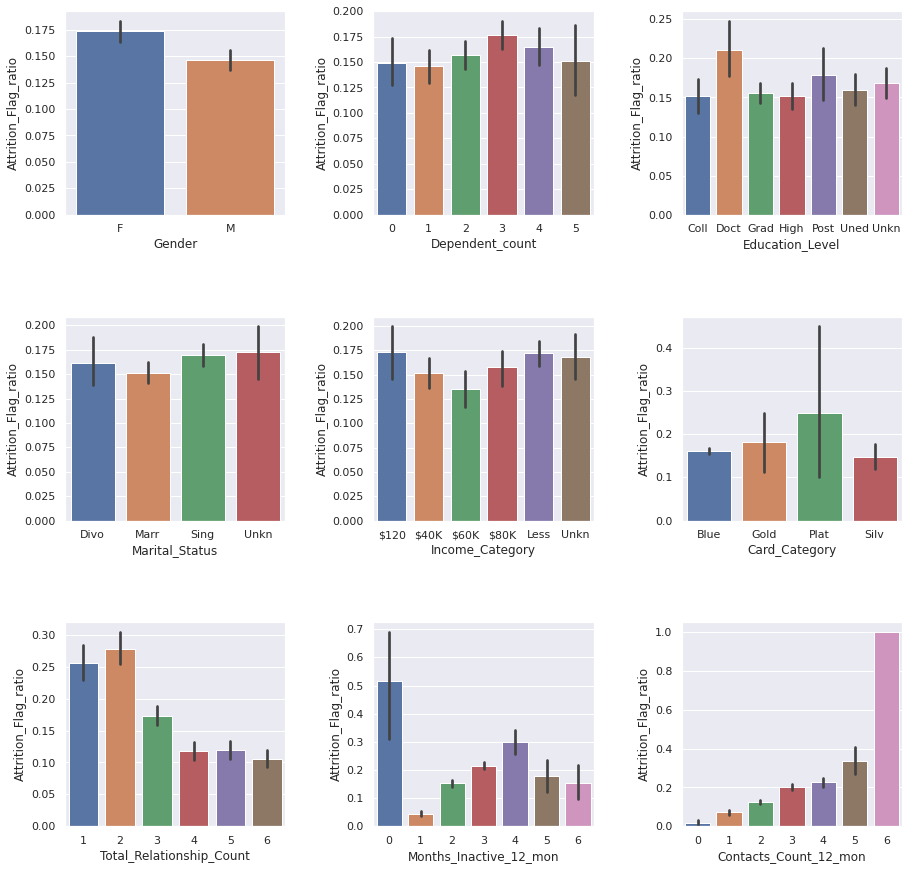

In [26]:
univariate_response(churners_3,cat_features,response,wrap = 3,type='bar',gridspec_kw=dict(hspace=0.5,wspace=0.4),figsize=(15,15),label_chars=4)

- Gender - slightly higher churn rate for Female
- Dependent Count - 3 dependants have positive influence on churn rate
- Education level - Doctors have positive influence on churn rate
- Martial status - no significant influence on churn rate
- Income category - \$60k-\$80k  has negative effect on churn rate
- Card category - has no significant effect on churn rate
- Total relationship - 1 and 2 relationships have highest ratio of churns, less ratio have customers with 3 relationships
- Months inactive - highest ratio of churn among active users, then ratio is rising from 1 to 4 months of non being active and fall for 5 and 6 months
- Contacts counts - ratio of churn is rising linearly with number of customer constacts

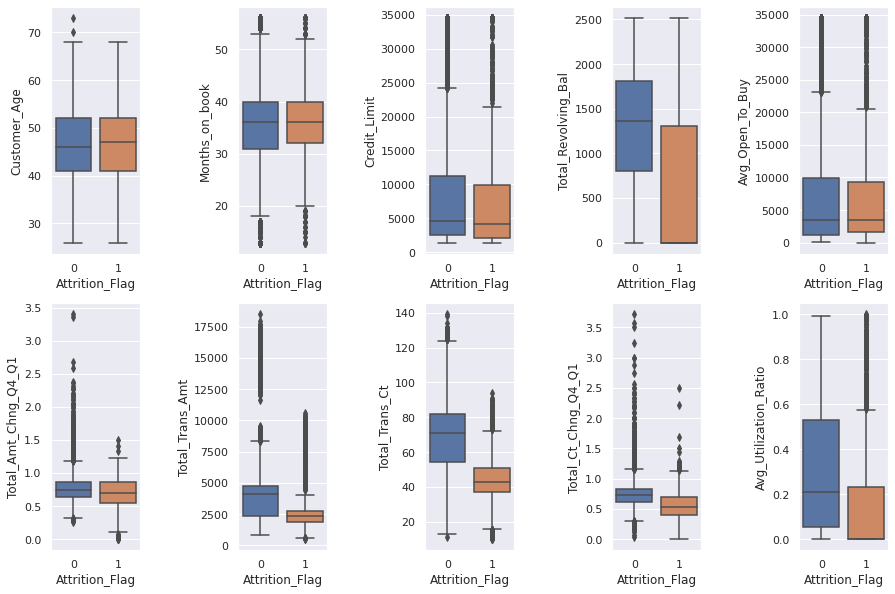

In [27]:
univariate_response(churners_3,num_features,response,wrap = 5,type='box',gridspec_kw=dict(wspace=1.1),figsize=(15,10))

- Customer who are churning characterize slight less total revolving balance, total transaction amount, total change in transactions change, average utilization ratio.
- There is strong difference according to total transactions count, customers who churn have visible less number of transactions

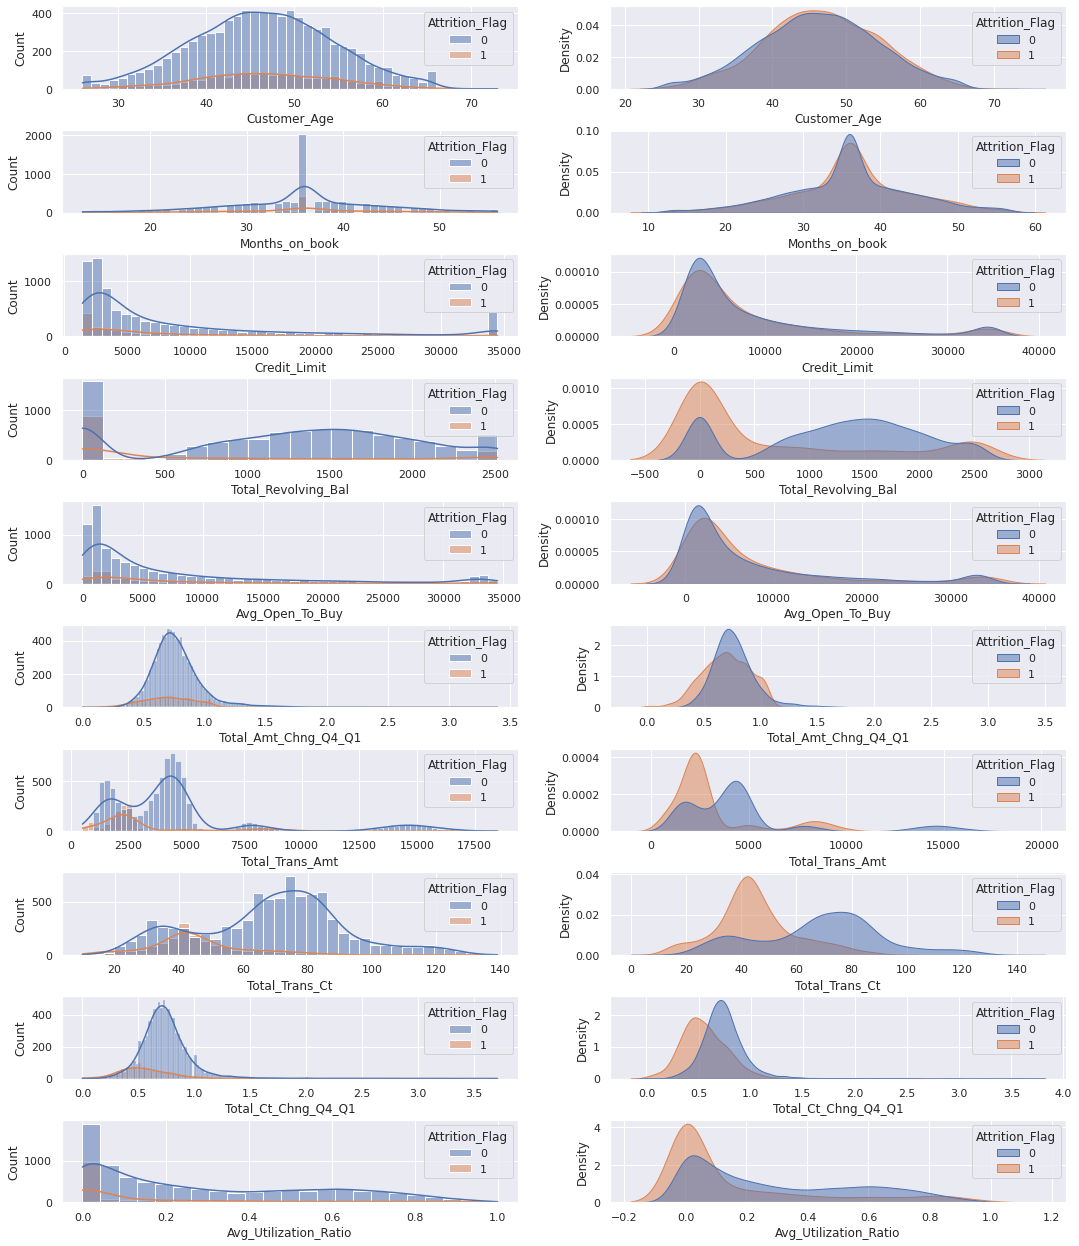

In [28]:
univariate_response(churners_3,num_features,response,wrap = 2,type='hist',gridspec_kw=dict(hspace=0.5),figsize=(18,22))

- Total revolving balance - customers with 0 TRB are willing to churn, and there is higher ratio in end of distribution
- Total amount change - for smaller change customers are more willing to churn
- Totoal transaction amount - customers with transactions around 25k and 80k are most willing to churn
- Total transaction count - customers with about 40 transactions are most willing to churn. It seems that all thuse who have less than 20 transactions churn
- Change in transaction count- Most of thuse who churned experienced low value of these indicator
- Average utilization ratio - Most of thuse who churned had 0 utilization ratio

### Pairplot

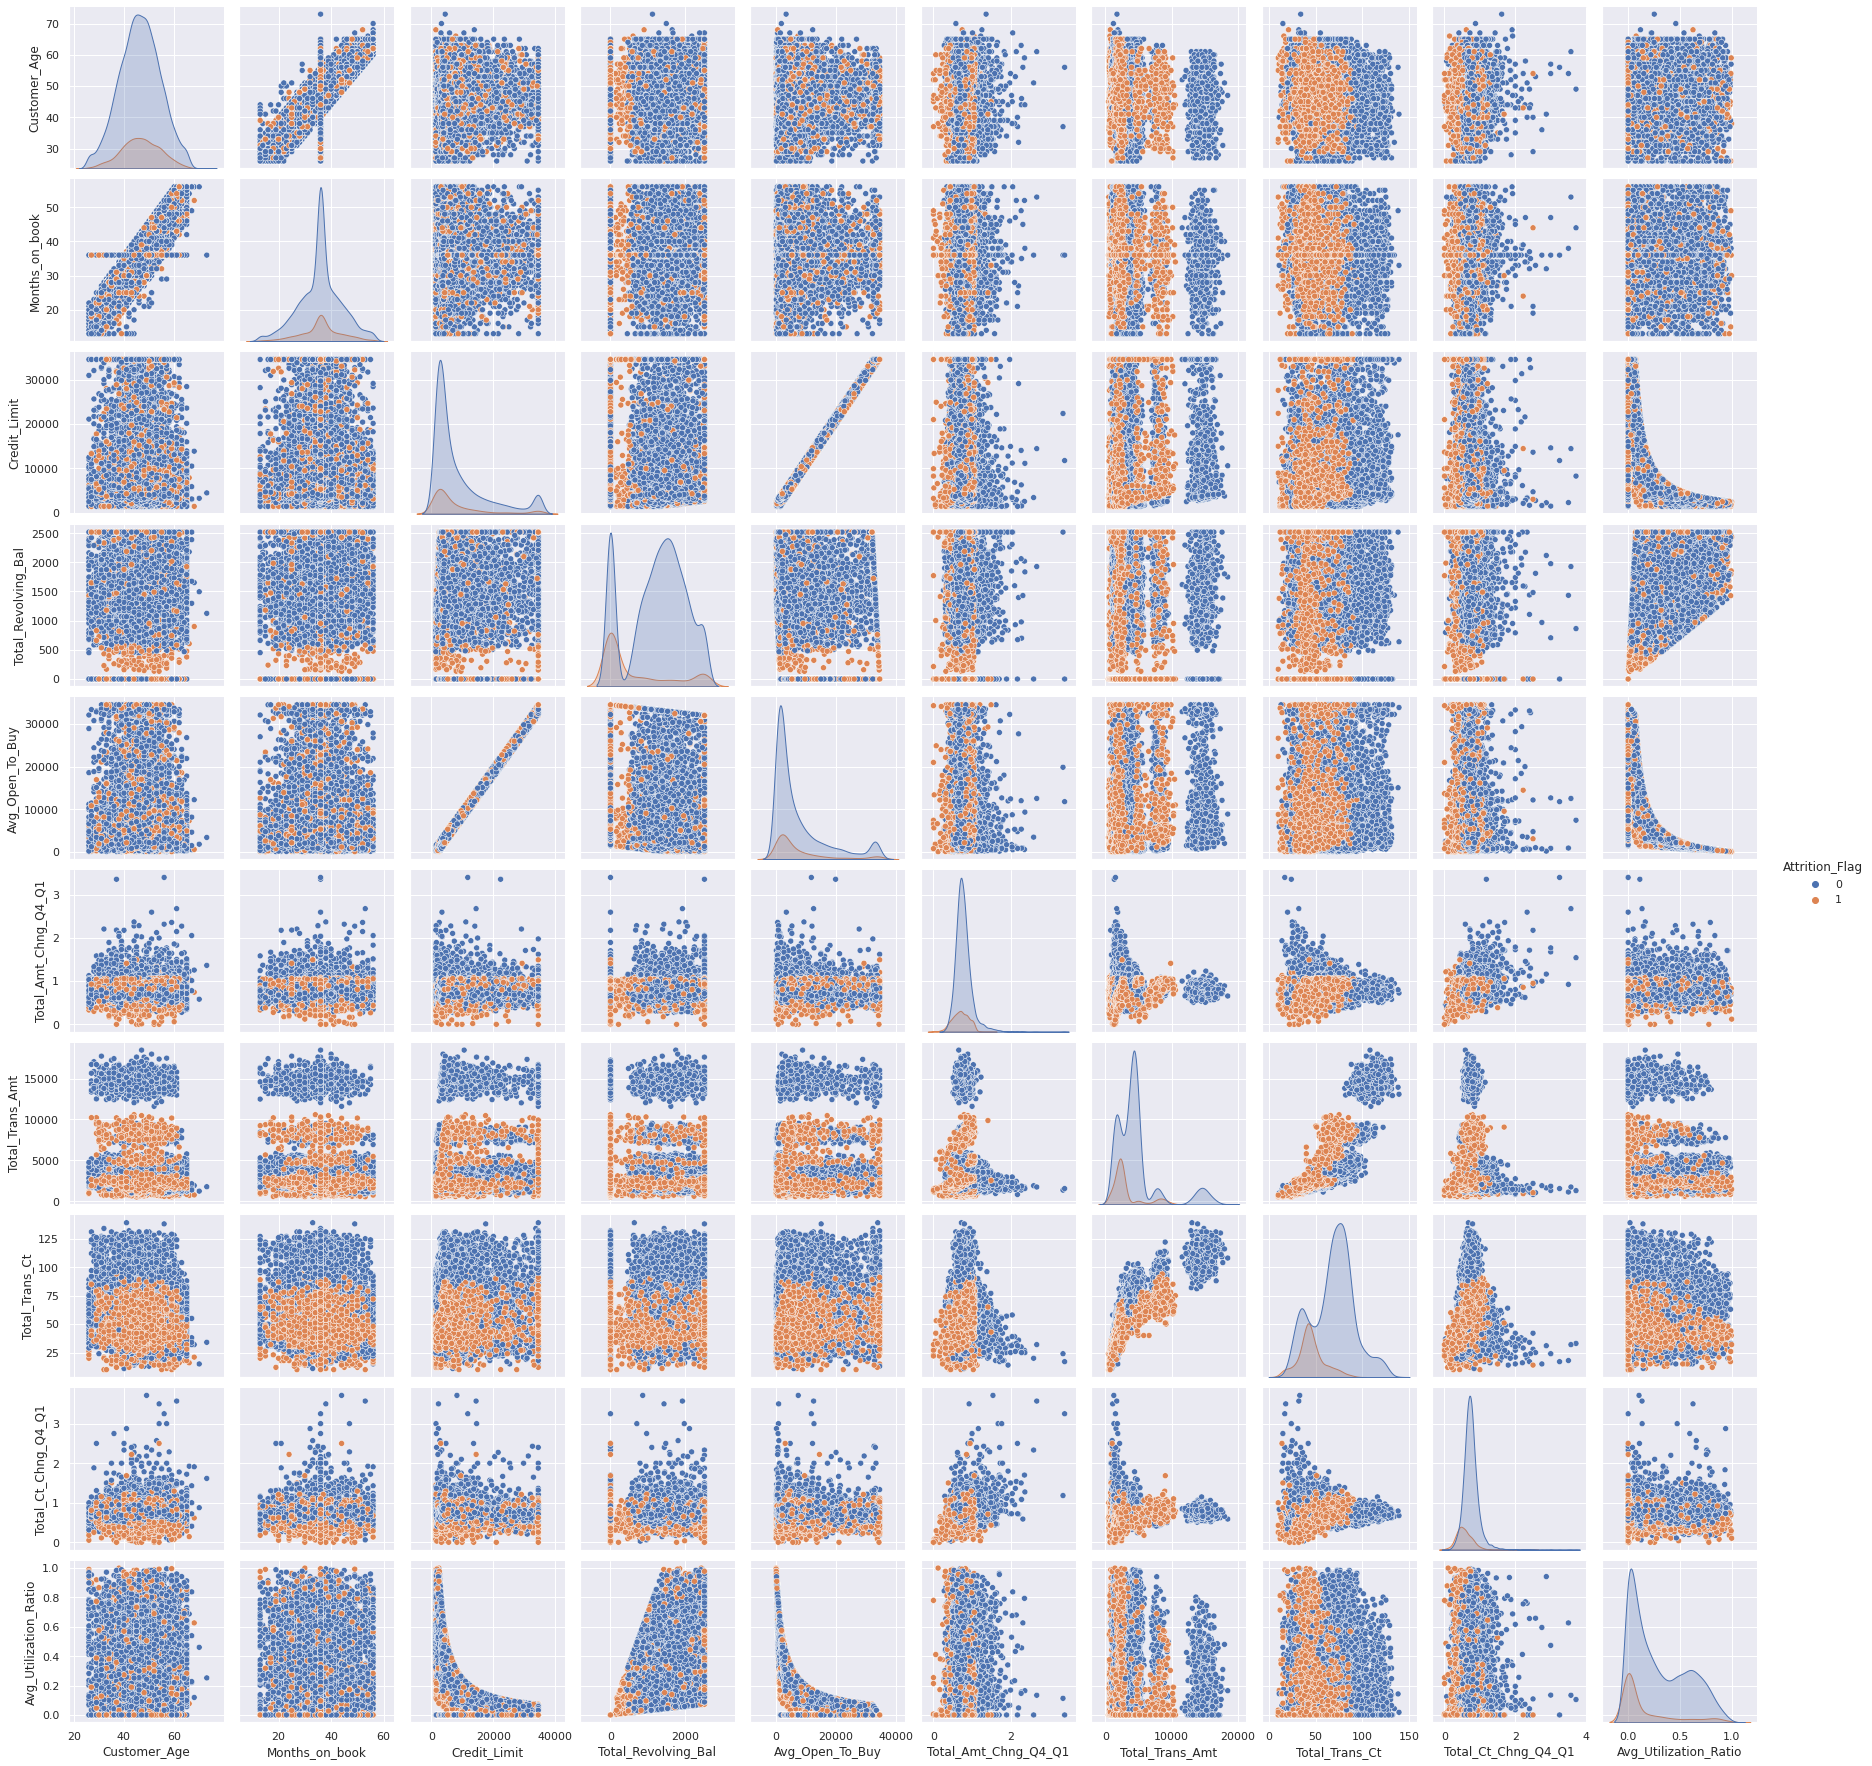

In [29]:
sns.pairplot(churners_3[num_features.values.tolist() + [response]] ,hue=response);

- Months on book and Customer Age have linear relationship
- Credit limit and Average open to buy have strong linear relationship
- Average utilization ratio have quadratic relationship with credit limit and average open to buy.
- Total transaction amount seems to separating churners with variables: total amount change, total transaction count, total count change
- Total transaction count seems to separating churners with variables total amount change, total transaction amount, total count change
- Total count change seems to separate churners with variables total amount change, total transaction amount, total transaction count

### Correlation plot

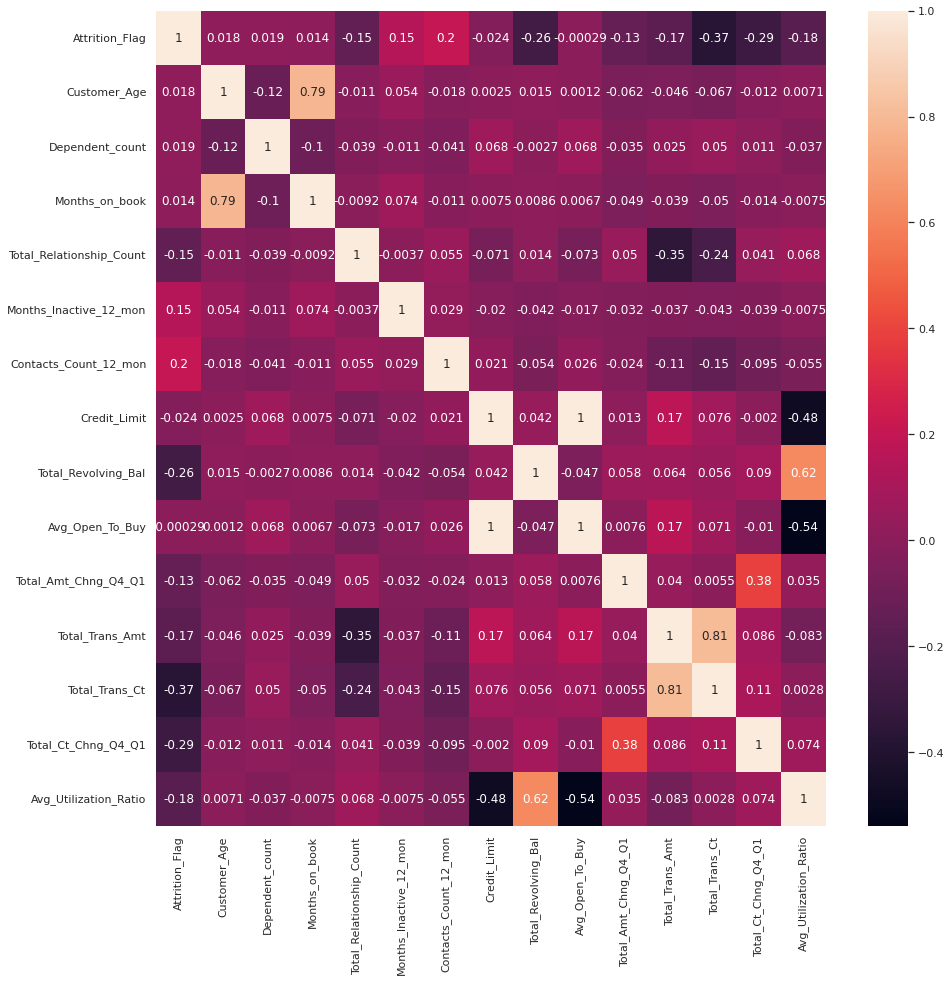

In [30]:
sns.set(rc={"figure.figsize":(15, 15)})
sns.heatmap(churners_3.corr(),annot=True);

- Average open to buy and Credit limit have correlation 1

### Interactions

In [31]:
# Functions for displaing interactions between 2/3 variables and variable
def interactions_2(data,n_col,c_col,response,wrap = 3,figsize=(8,8),gridspec_kw=dict(wspace=0.4),type='both'):
  import math
  c_col = data[c_col].nunique().sort_values(ascending=False).index.values.tolist()
  if type == 'cat' or type == 'both' :
    c = len(c_col)
    l = c*(c-1)//2
    fig, ax = plt.subplots(math.ceil(l/wrap),wrap,figsize=figsize,gridspec_kw=gridspec_kw, squeeze=False)
    sns.set_theme()
    k = 0
    for i in range(c-1):
      for j in range(i+1,c):
        sns.barplot(x=c_col[i], y=response, hue=c_col[j], data=data, ax = ax[k//wrap][k%wrap])
        ax[k//wrap][k%wrap].set_ylabel(response + '_ratio')
        k += 1
  
  if type == 'num' or type == 'both' :
    c = len(c_col)
    n = len(n_col)
    l = c*n*2
    fig, ax = plt.subplots(math.ceil(l/wrap),wrap,figsize=figsize,gridspec_kw=gridspec_kw, squeeze=False)
    sns.set_theme()
    k = 0
    for i in range(n):
      for j in range(c):
        sns.boxplot(data=data,y=n_col[i],x=c_col[j],hue=response, ax = ax[k//wrap][k%wrap], showfliers = True)
        k += 1
        sns.boxplot(data=data,y=n_col[i],x=c_col[j],hue=response, ax = ax[k//wrap][k%wrap], showfliers = False)
        k += 1

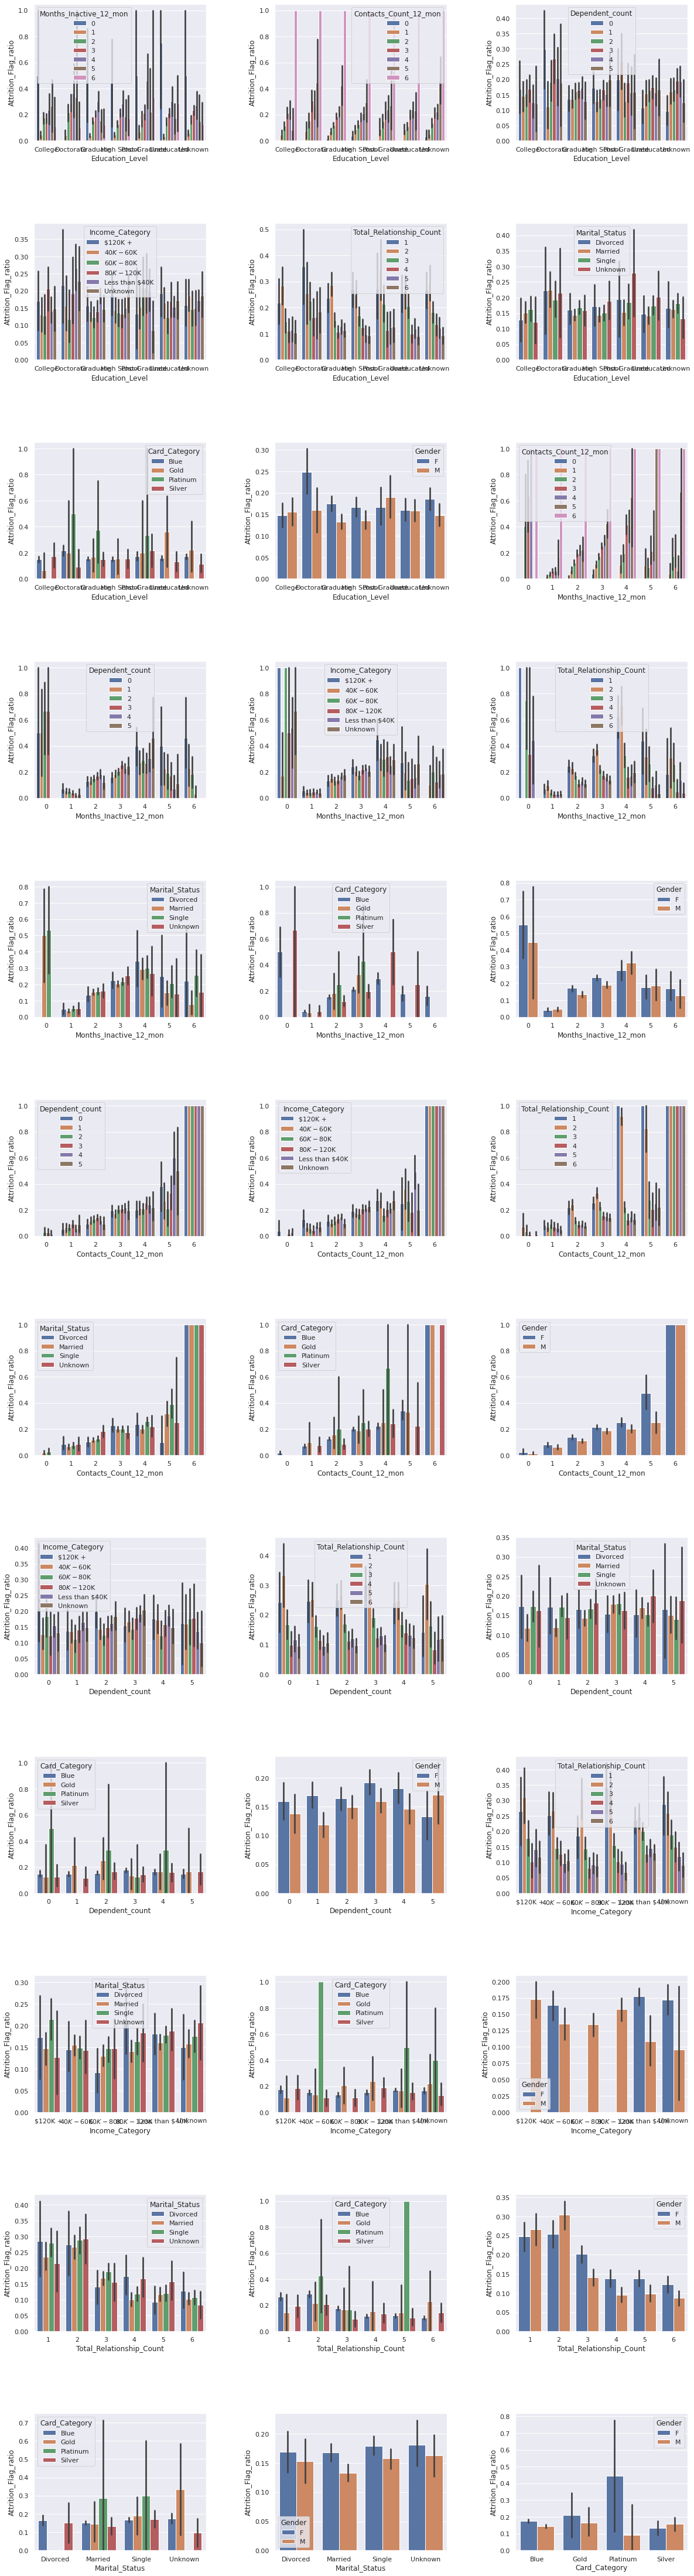

In [32]:
# Interaction between categorical variables and response
interactions_2(churners_3,num_features,cat_features,response,wrap = 3,figsize=(20,80),gridspec_kw=dict(wspace=0.4,hspace=0.6),type = 'cat')

- For 5 contacts female have higher ratio of churners than men
- Female doctor are more willing to churn
- In some categories of income there is no females

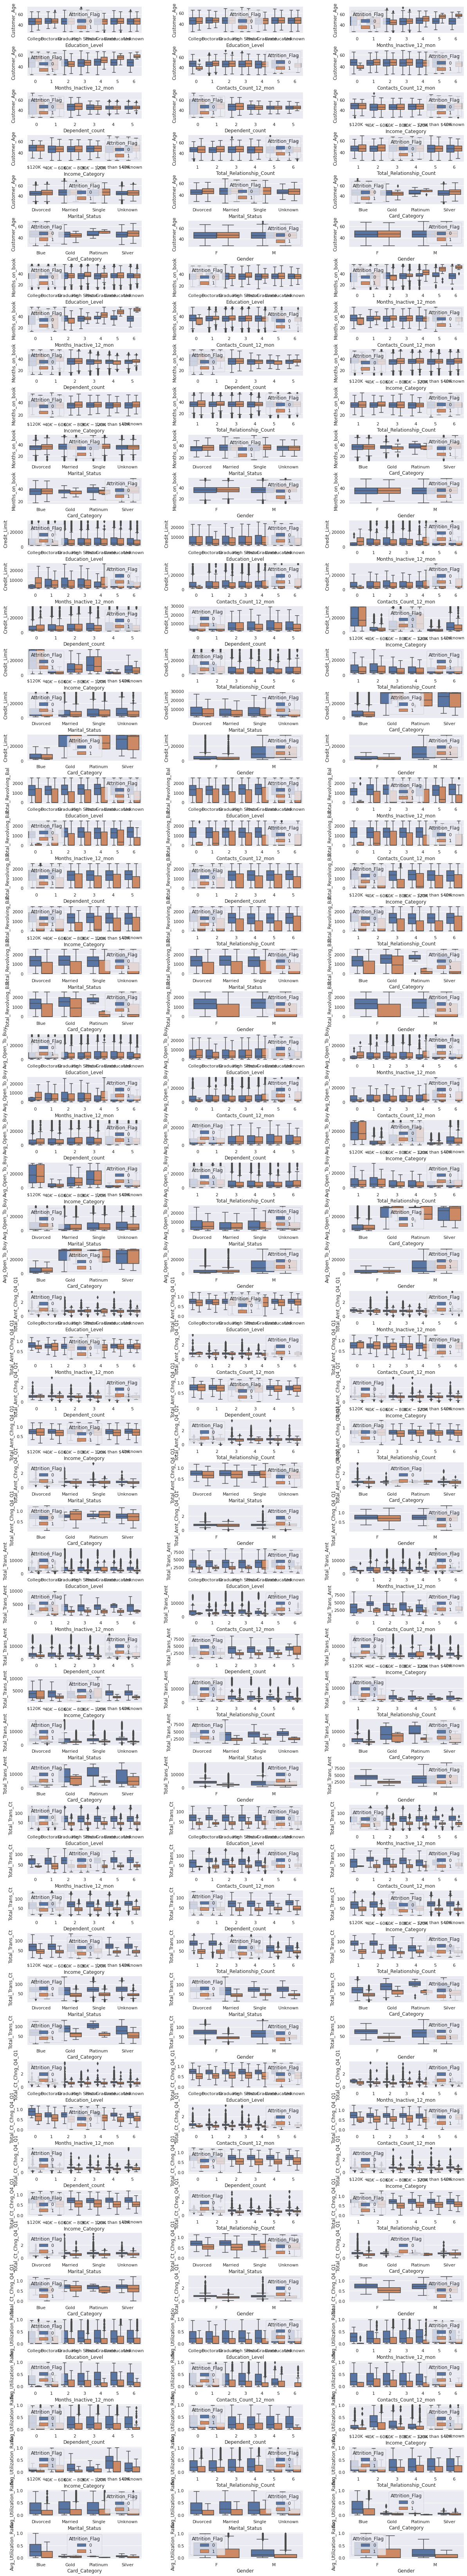

In [33]:
# plots of interaction of one continuous and categorical variable, with and without outliers
interactions_2(churners_3,num_features,cat_features,response,wrap = 3,figsize=(20,120),gridspec_kw=dict(wspace=0.4,hspace=0.6),type = 'num')

- Months on book and month inactive 4,5,6 give some relationship
- Total transaction amount and concact number give some relationship
- Blue and other cards have signifficantly different credit limits, average open to buy
- Divorced, Single and Unknown have significantly different total transaction amount among churners and not
- Females have significantly different total transaction amount among churners and not
- 1 or 2 relationships have significantly different total transaction count among churners and not

### Most impotant findings

- Dataset is highly unbalanced
- Most of variables have skewed distribution
- Bank have 4 types of Credit
Cards: Blue, Silver, Gold and
Platinum
- There is no significant
difference between churn rate
in types of Credit Cards categories
- Most customers held 3 and
more products
- Churn ratio for customers with
1 or 2 products is significantly
higher than remaining
- Most of customers are
inactive 1,2 or 3 months
- Churn ratio is increasing with
months of inactivity up to 4th
month then it is getting lower
- It seems that we can separate
customers according to 3 groups of
Total transaction amount
- Churn ratio seems to increase in
two lower groups of Total transaction amount with
increase of number of contacts
- Low Total transaction amount and Total transaction count indicate high probability of Churn

## Conclusions

- Bank should focus on marketing the Credit Card spending as it will prevent
customers churn the most
- High ratio of customers do not resign suddenly from Credit Card but theirs
behaviour change over time with lower transactions amount and number, also
customers become inactive before churn, it is time for bank to act and get them
back to active use of Credit Cards
- One more measure is to get customers into higher number of products held by
them. Clients having 1 or 2 products are more willing to churn